In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)

sys.path.append('../../src')
import analyze
import raybay

In [2]:
# Load treatment plan results
approved = np.load('approved/res.pkl', allow_pickle=True)
default = np.load('default/res.pkl', allow_pickle=True)
result = np.load('grid/res_grid_1.pkl', allow_pickle=True)

In [3]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Chestwall_L,MaxDvh,AtMost,3000,2.04
1,D2cm,MaxDose,AtMost,2400,NaN
2,Esophagus,MaxDvh,AtMost,1880,16.91
3,Lungs,MaxDvh,AtMost,1160,29.19
4,Lungs,MaxDvh,AtMost,1240,19.46
5,PTV,MinDvh,AtLeast,4800,95.00
6,PTV,MaxDose,AtMost,8000,NaN
7,Rib,MaxDvh,AtMost,3200,0.27
8,Rib,MaxDose,AtMost,4000,NaN
9,SpinalCanal,MaxDvh,AtMost,1360,2.30


In [246]:
# Constituent functions
result.func_df = raybay.get_funcs('grid2/funcs.csv')

# This was for the 1D grid search, but now we have Rib MaxDose [0,4000] as well

In [173]:
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Chestwall_L,MaxDvh,3000,2.04,NaN,1
1,D2cm,MaxDose,"[700.0, 2400.0]",0,NaN,1
2,Esophagus,MaxDvh,1880,16.91,NaN,1
3,Lungs,MaxDvh,1160,29.19,NaN,1
4,Lungs,MaxDvh,1240,19.46,NaN,1
5,PTV,MinDvh,4800,95,NaN,1
6,PTV,MaxDose,8000,0,NaN,1
7,Rib,MaxDvh,3200,0.27,NaN,1
8,Rib,MaxDose,"[0.0, 4000.0]",0,NaN,1
9,SpinalCanal,MaxDvh,1360,2.3,NaN,1


In [423]:
# Load 2D grid search results
# Computed in batches due to connection timing out
goal_dict_1 = np.load('grid2/goal_dict_1.pkl', allow_pickle=True) # (0,0) - (100,2700)
goal_dict_2 = np.load('grid2/goal_dict_2.pkl', allow_pickle=True) # (200,0) - (700,100)
goal_dict_3 = np.load('grid2/goal_dict_3.pkl', allow_pickle=True) # (100,2800) - (100,4000)
goal_dict_4 = np.load('grid2/goal_dict_4.pkl', allow_pickle=True) # (700,0) - (1200,2000)
goal_dict_5 = np.load('grid2/goal_dict_5.pkl', allow_pickle=True) # (1200,2100) - (1200,4000)
goal_dict_6 = np.load('grid2/goal_dict_6.pkl', allow_pickle=True) # (1300,0) - (1500,2200)
goal_dict_7 = np.load('grid2/goal_dict_7.pkl', allow_pickle=True) # (1500,2300) - (1500,4000)

In [429]:
# Create results for (0,0) - (1200,4000)
d2cm = np.arange(0, 1600, 100)
rib = np.arange(0, 4100, 100)
goal_dict = {ii: goal_dict_1[ii].copy() for ii in goal_dict_1}
for ii in goal_dict:
    goal_dict[ii] += goal_dict_3[ii]
    goal_dict[ii] += goal_dict_2[ii][:-2]
    goal_dict[ii] += goal_dict_4[ii]
    goal_dict[ii] += goal_dict_5[ii]
    goal_dict[ii] += goal_dict_6[ii]
    goal_dict[ii] += goal_dict_7[ii]
x_iters = [[ii, jj] for ii in d2cm for jj in rib]
[X, Y] = np.meshgrid(d2cm, rib)

In [430]:
# Now what do I want to do with this data?
# - plot parameters vs. flags (need to get from logs)
# - plot parameters vs. goal values
# - plot parameters vs. different utility values

In [431]:
# Read log files to get flags
flag_list_1 = []
f = open('grid2/log_grid_1.txt', 'r')
for line in f:
    flag = int(line.split()[4][:-1])
    flag_list_1.append(flag)
f.close()

flag_list_2 = []
f = open('grid2/log_grid_2.txt', 'r')
for line in f:
    flag = int(line.split()[4][:-1])
    flag_list_2.append(flag)
f.close()

flag_list_3 = []
f = open('grid2/log_grid_3.txt', 'r')
for line in f:
    flag = int(line.split()[3][:-1])
    flag_list_3.append(flag)
f.close()

flag_list_4 = []
f = open('grid2/log_grid_4.txt', 'r')
for line in f:
    flag = int(line.split()[4][:-1])
    flag_list_4.append(flag)
f.close()

flag_list_5 = []
f = open('grid2/log_grid_5.txt', 'r')
for line in f:
    flag = int(line.split()[3][:-1])
    flag_list_5.append(flag)
f.close()

flag_list_6 = []
f = open('grid2/log_grid_6.txt', 'r')
for line in f:
    flag = int(line.split()[4][:-1])
    flag_list_6.append(flag)
f.close()

flag_list_7 = []
f = open('grid2/log_grid_7.txt', 'r')
for line in f:
    flag = int(line.split()[3][:-1])
    flag_list_7.append(flag)
f.close()

In [432]:
# Compile flag lists
flag_list = flag_list_1.copy()
flag_list += flag_list_3
flag_list += flag_list_2[:-2]
flag_list += flag_list_4
flag_list += flag_list_5
flag_list += flag_list_6
flag_list += flag_list_7

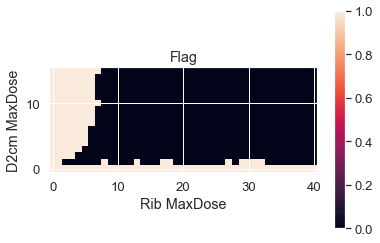

In [433]:
# Flags vs. parameters
Z = np.zeros_like(X)
F = np.ones_like(X)
k = 0
for ii in range(len(d2cm)):
    for jj in range(len(rib)):
        Z[jj, ii] = flag_list[k]
        F[jj, ii] = 0 if flag_list[k] == 1 else 1
        k += 1
plt.imshow(Z.T, origin='lower')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Flag')
plt.colorbar();

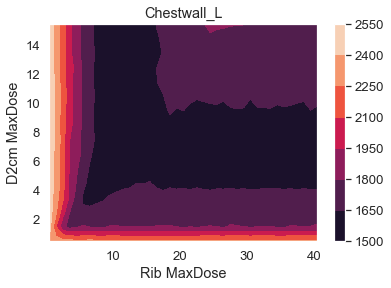

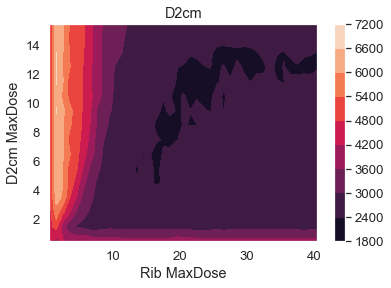

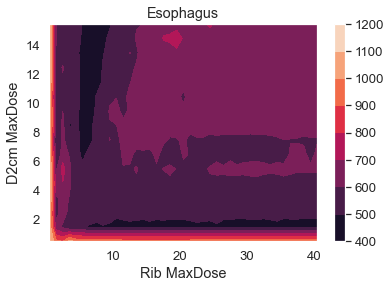

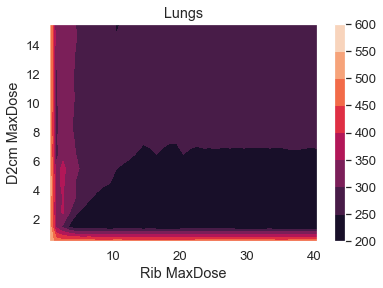

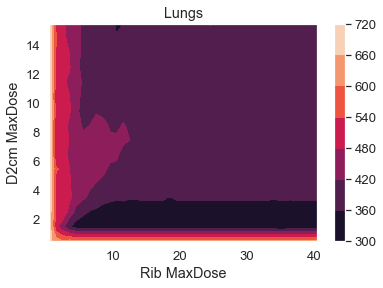

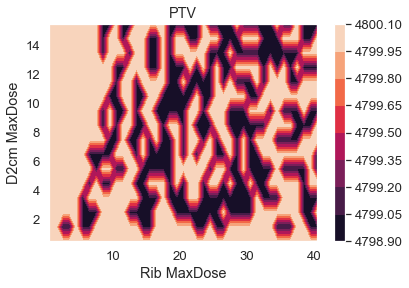

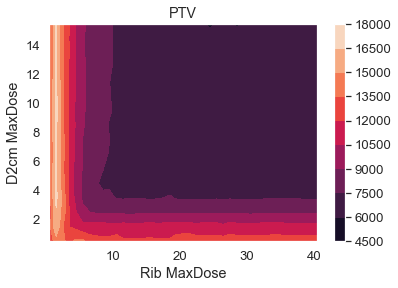

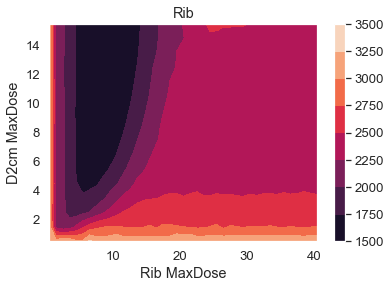

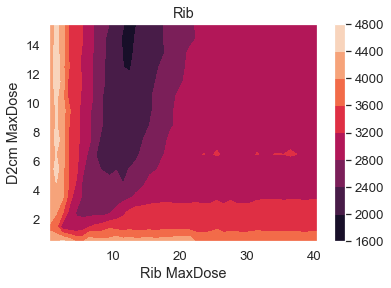

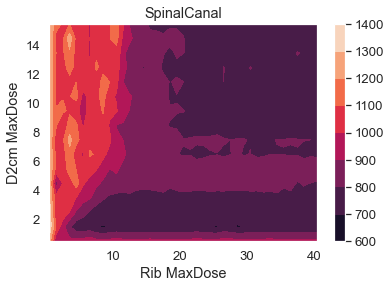

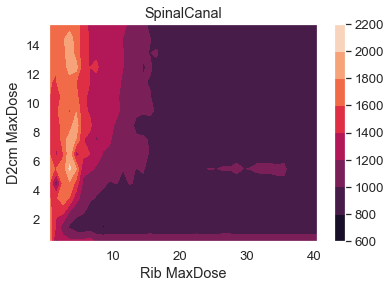

In [434]:
# Goal values vs. parameters
# Maybe put lines around regions that meet goals or don't meet goals
for goal in goal_dict:
    Z = np.zeros_like(X)
    k = 0
    for ii in range(len(d2cm)):
        for jj in range(len(rib)):
            Z[jj, ii] = goal_dict[goal][k]
            k += 1
    plt.figure()
    plt.contourf(Z.T, origin='lower')
    plt.xlabel('Rib MaxDose')
    plt.ylabel('D2cm MaxDose')
    plt.title(result.goal_df.iloc[goal]['Roi'])
    plt.colorbar()

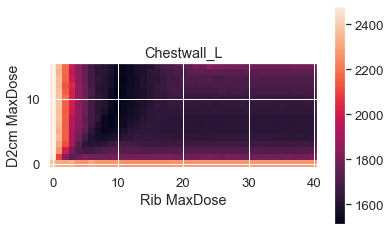

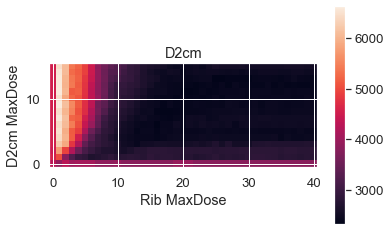

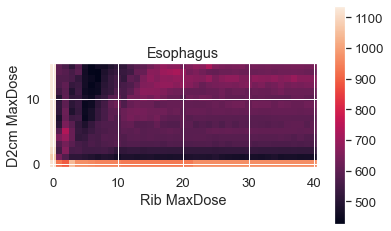

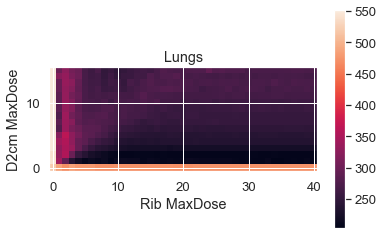

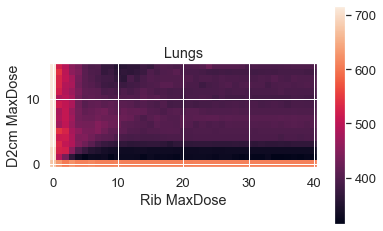

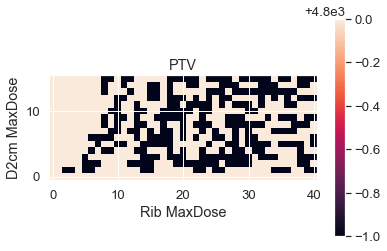

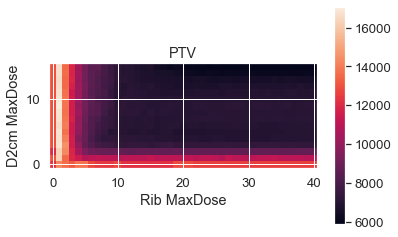

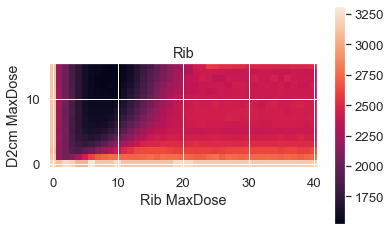

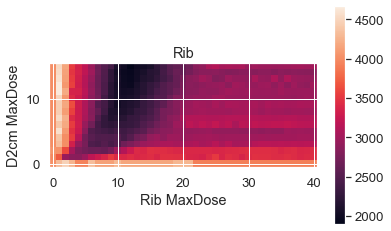

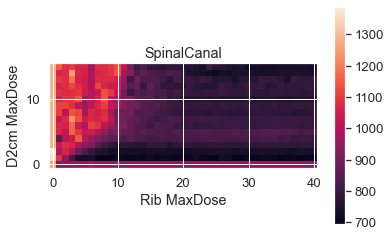

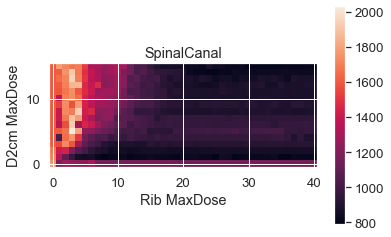

In [435]:
# Goal values vs. parameters
# Maybe put lines around regions that meet goals or don't meet goals
for goal in goal_dict:
    Z = np.zeros_like(X)
    k = 0
    for ii in range(len(d2cm)):
        for jj in range(len(rib)):
            Z[jj, ii] = goal_dict[goal][k]
            k += 1
    plt.figure()
    plt.imshow(Z.T, origin='lower')
    plt.xlabel('Rib MaxDose')
    plt.ylabel('D2cm MaxDose')
    plt.title(result.goal_df.iloc[goal]['Roi'])
    plt.colorbar()

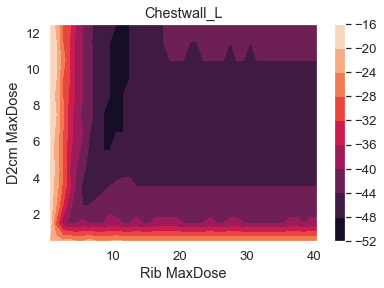

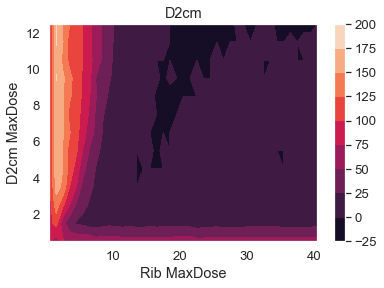

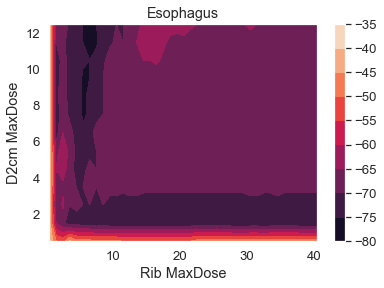

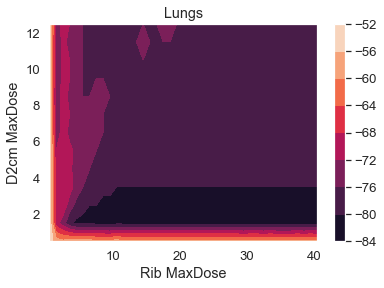

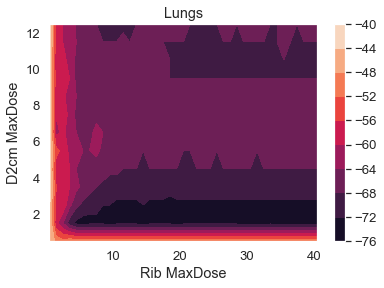

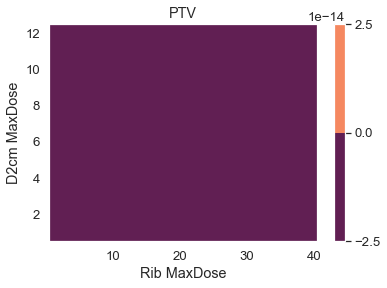

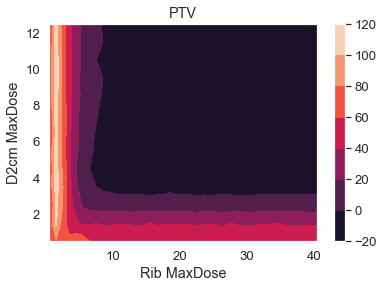

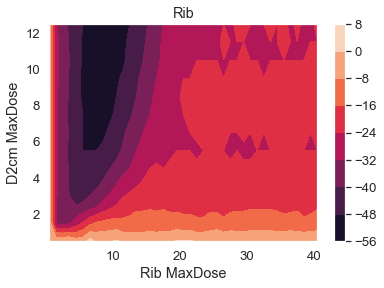

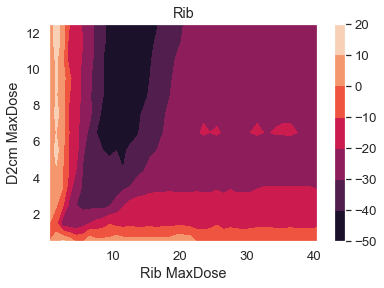

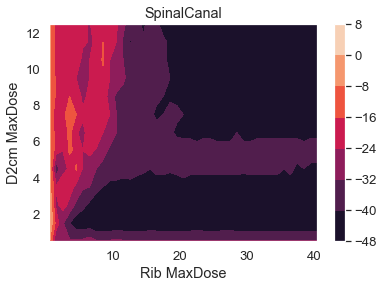

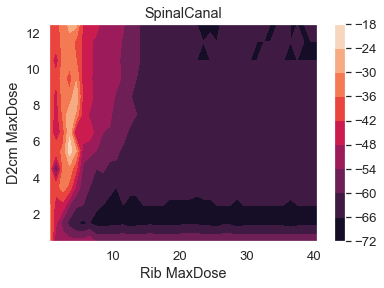

In [269]:
# Percent difference vs. parameters
for goal in goal_dict:
    Z = np.zeros_like(X)
    k = 0
    for ii in range(len(d2cm)):
        for jj in range(len(rib)):
            level = result.goal_df.iloc[goal]['AcceptanceLevel']
            Z[jj, ii] = 100*(goal_dict[goal][k] - level)/level
            k += 1
    plt.figure()
    plt.contourf(Z.T, origin='lower')
    plt.xlabel('Rib MaxDose')
    plt.ylabel('D2cm MaxDose')
    plt.title(result.goal_df.iloc[goal]['Roi'])
    plt.colorbar()

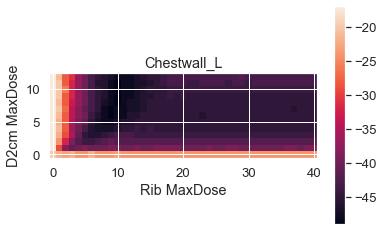

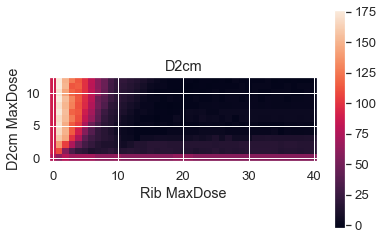

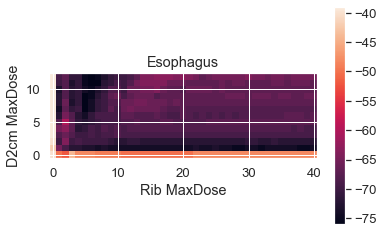

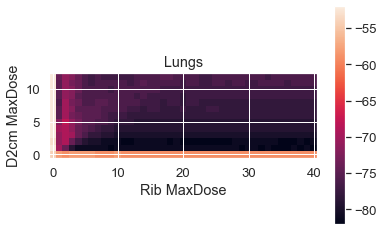

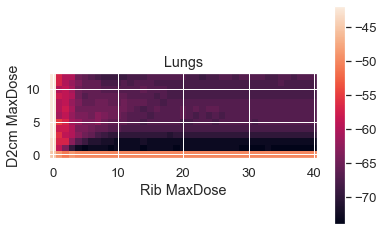

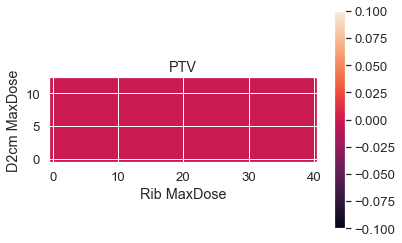

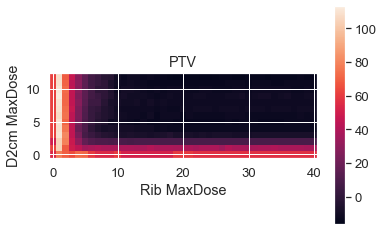

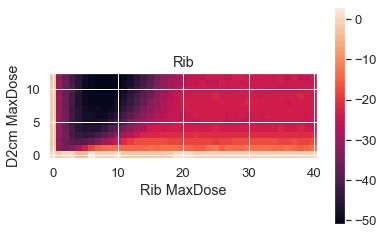

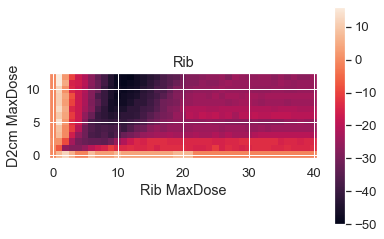

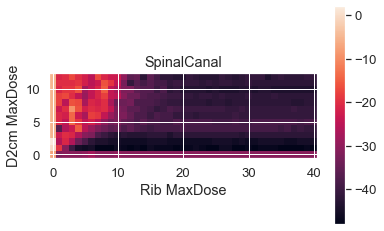

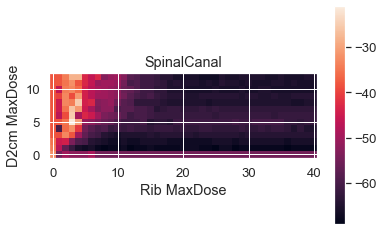

In [263]:
# Percent difference vs. parameters
for goal in goal_dict:
    Z = np.zeros_like(X)
    k = 0
    for ii in range(len(d2cm)):
        for jj in range(len(rib)):
            level = result.goal_df.iloc[goal]['AcceptanceLevel']
            Z[jj, ii] = 100*(goal_dict[goal][k] - level)/level
            k += 1
    plt.figure()
    plt.imshow(Z.T, origin='lower')
    plt.xlabel('Rib MaxDose')
    plt.ylabel('D2cm MaxDose')
    plt.title(result.goal_df.iloc[goal]['Roi'])
    plt.colorbar()

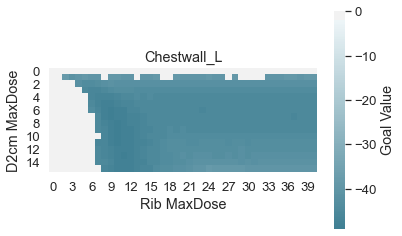

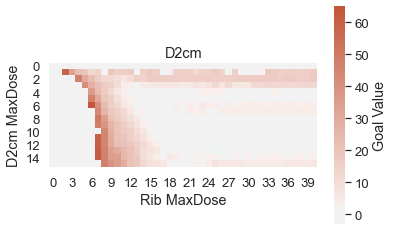

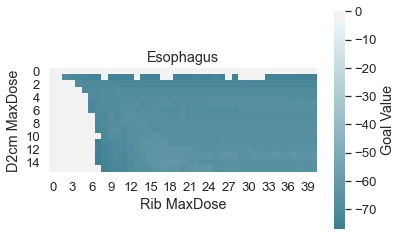

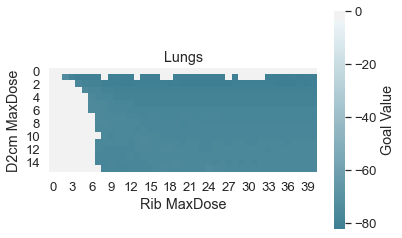

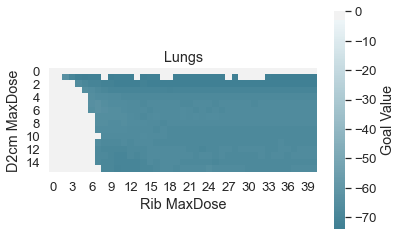

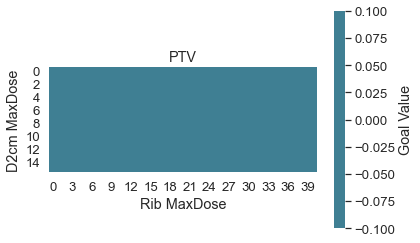

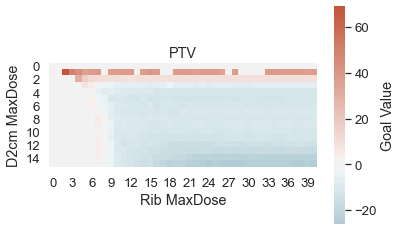

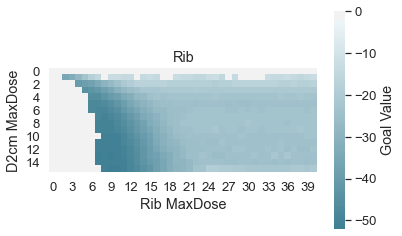

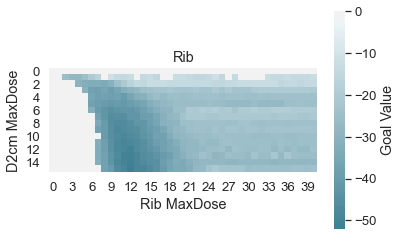

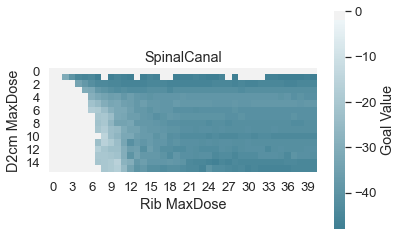

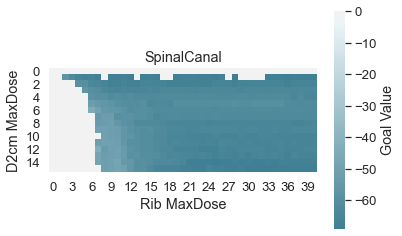

In [438]:
# Percent difference vs. parameters

# Figure out how to flip y direction
# sns also has clutering! clustermap
# use mask with flag!!! mask doesn't work :(

for goal in goal_dict:
    Z = np.zeros_like(X)
    k = 0
    for ii in range(len(d2cm)):
        for jj in range(len(rib)):
            level = result.goal_df.iloc[goal]['AcceptanceLevel']
            Z[jj, ii] = 100*(goal_dict[goal][k] - level)/level
            k += 1
    fig, ax = plt.subplots()
    sns.heatmap(F.T*Z.T, cmap=sns.diverging_palette(220, 20, n=256), center=0,
                cbar_kws={'label': 'Goal Value'}, ax=ax, square=True)
    ax.set_xlabel('Rib MaxDose')
    ax.set_ylabel('D2cm MaxDose')
    ax.set_title(result.goal_df.iloc[goal]['Roi'])

(15, 15)


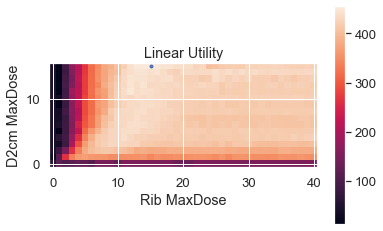

In [439]:
# Linear utility vs. parameters
Z = np.zeros_like(X)
k = 0
for ii in range(len(d2cm)):
    for jj in range(len(rib)):
        for index, row in result.goal_df.iterrows():
            Z[jj, ii] += raybay.get_term(goal_dict[index][k], row['AcceptanceLevel'], row['Type'], 'linear')
        k += 1
plt.imshow(Z.T, origin='lower')
idx = np.unravel_index(np.argmax(Z), Z.shape)
plt.plot(idx[0], idx[1], '.')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear Utility')
plt.colorbar()
print(idx)

(13, 5)


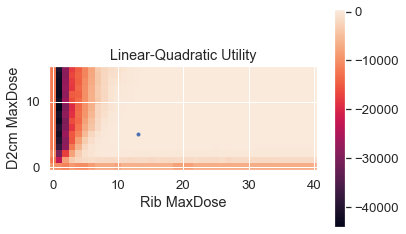

In [440]:
# Linear-quadratic utility vs. parameters
Z = np.zeros_like(X)
k = 0
for ii in range(len(d2cm)):
    for jj in range(len(rib)):
        for index, row in result.goal_df.iterrows():
            Z[jj, ii] += raybay.get_term(goal_dict[index][k], row['AcceptanceLevel'], row['Type'], 'linear_quadratic')
        k += 1
plt.imshow(Z.T, origin='lower')
idx = np.unravel_index(np.argmax(Z), Z.shape)
plt.plot(idx[0], idx[1], '.')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear-Quadratic Utility')
plt.colorbar()
print(idx)

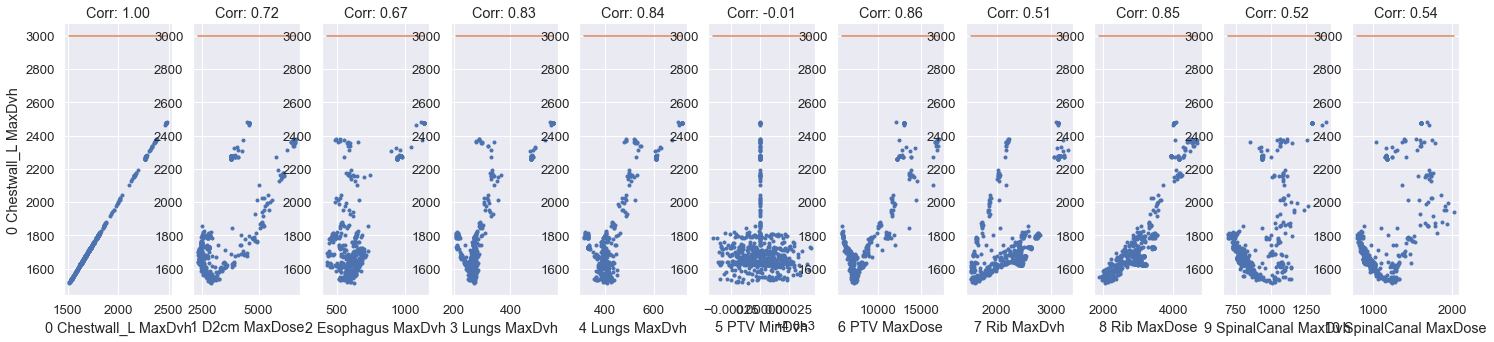

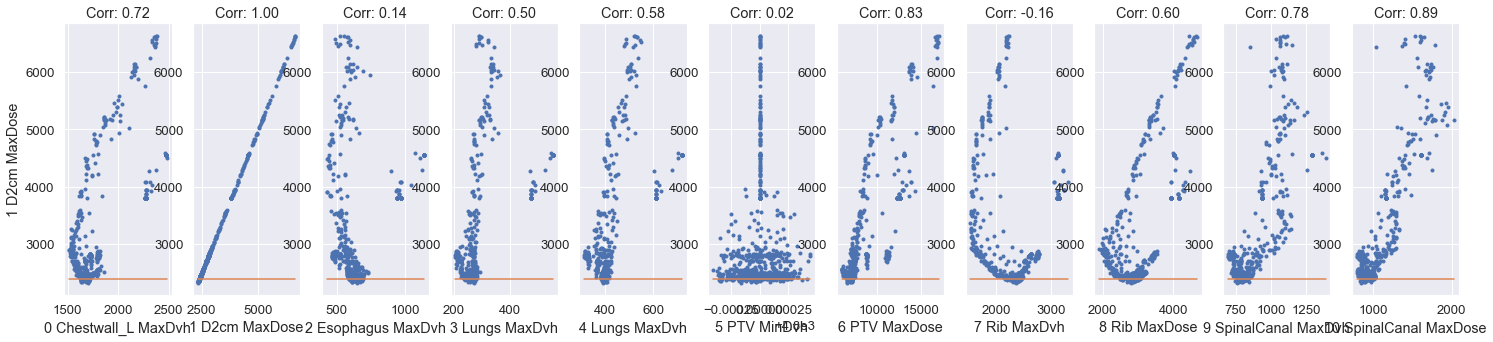

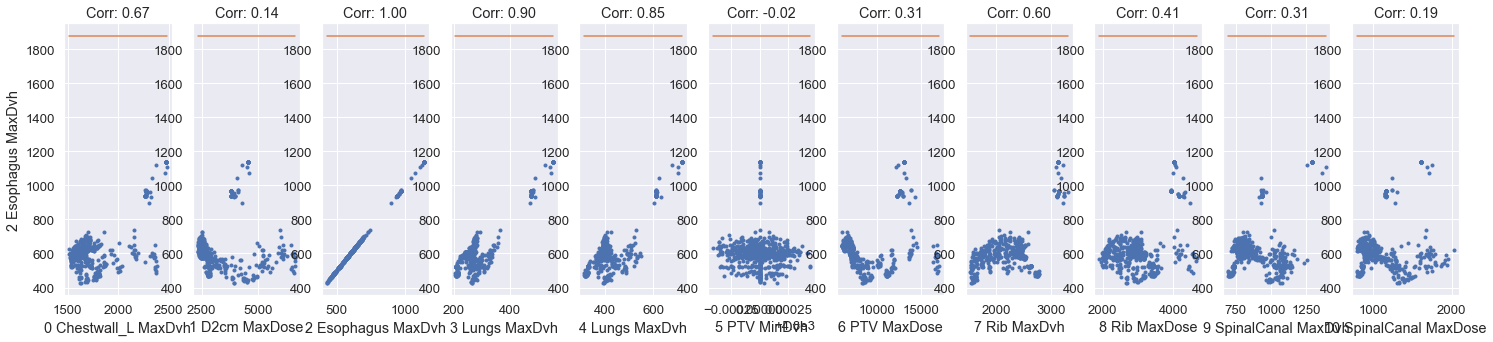

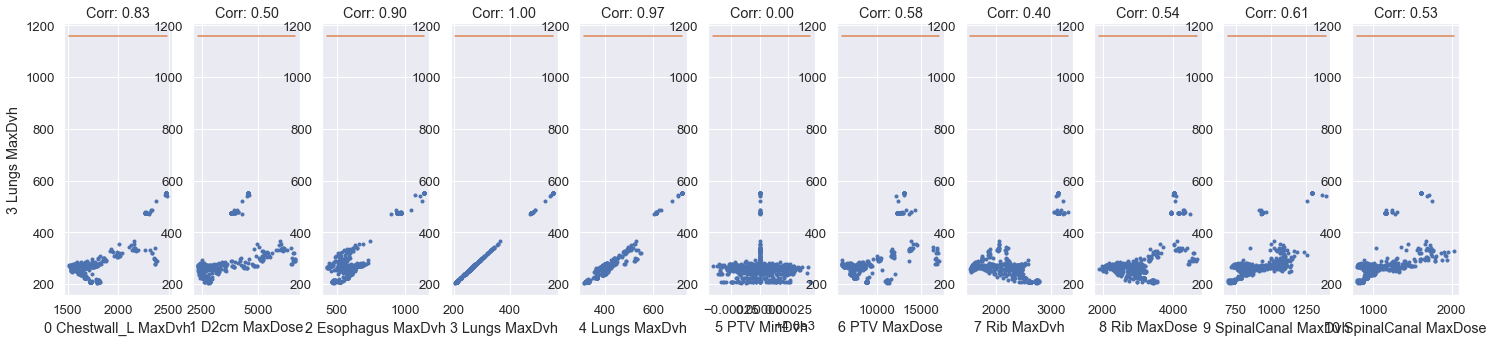

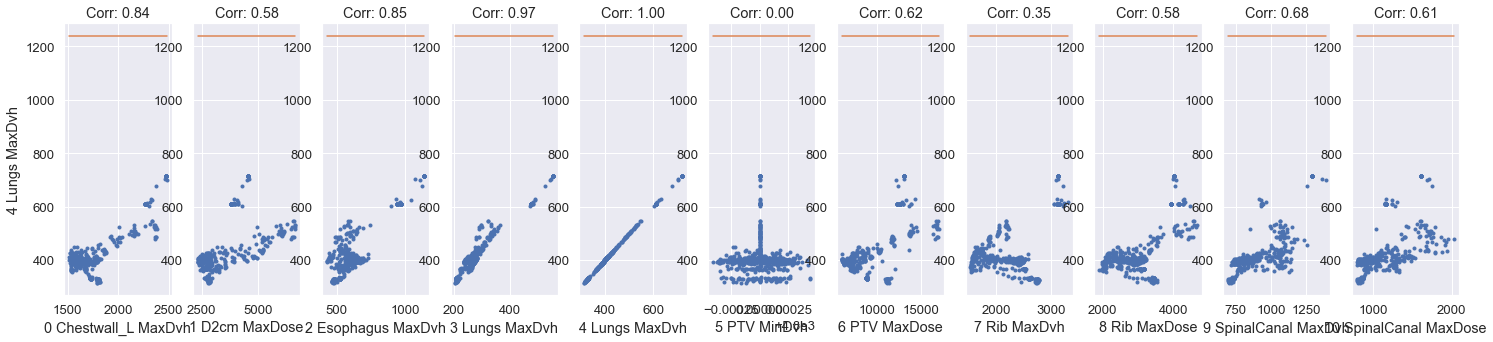

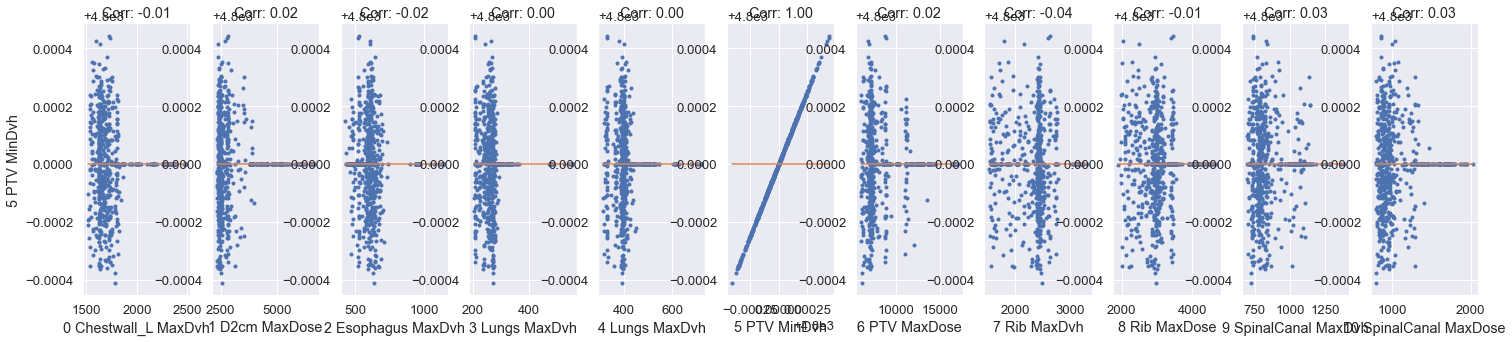

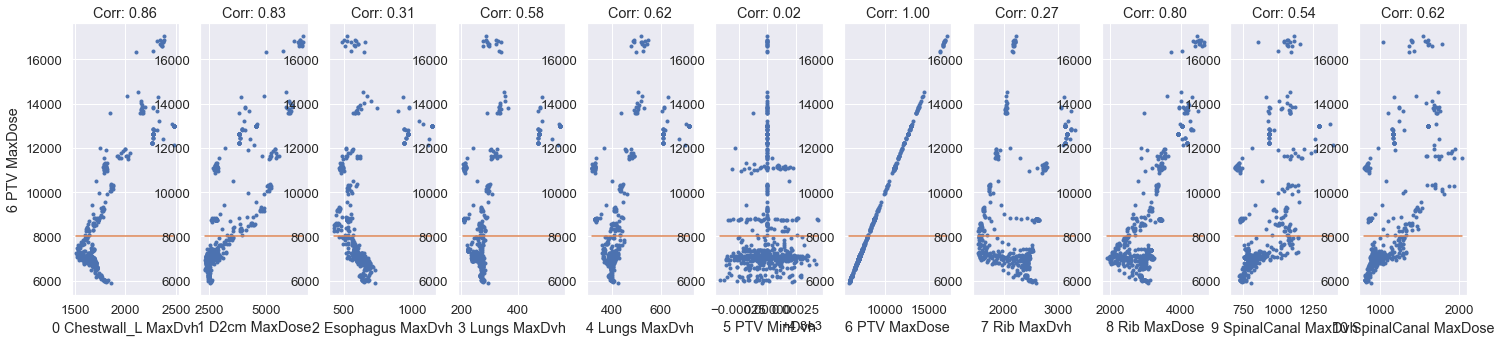

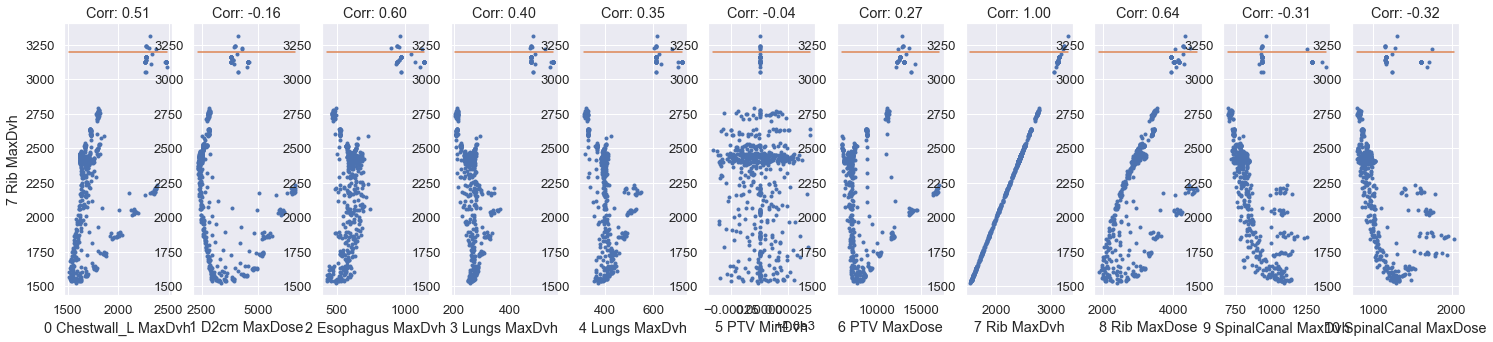

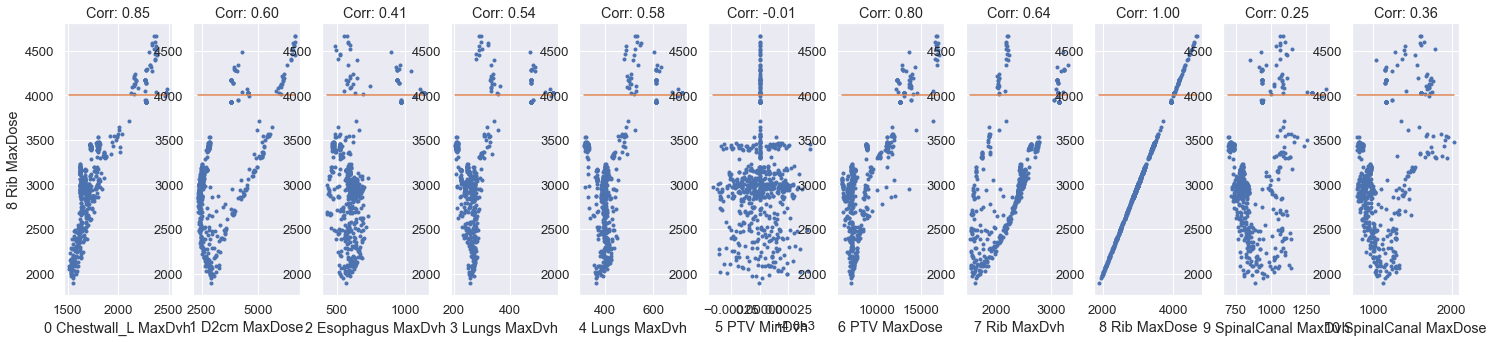

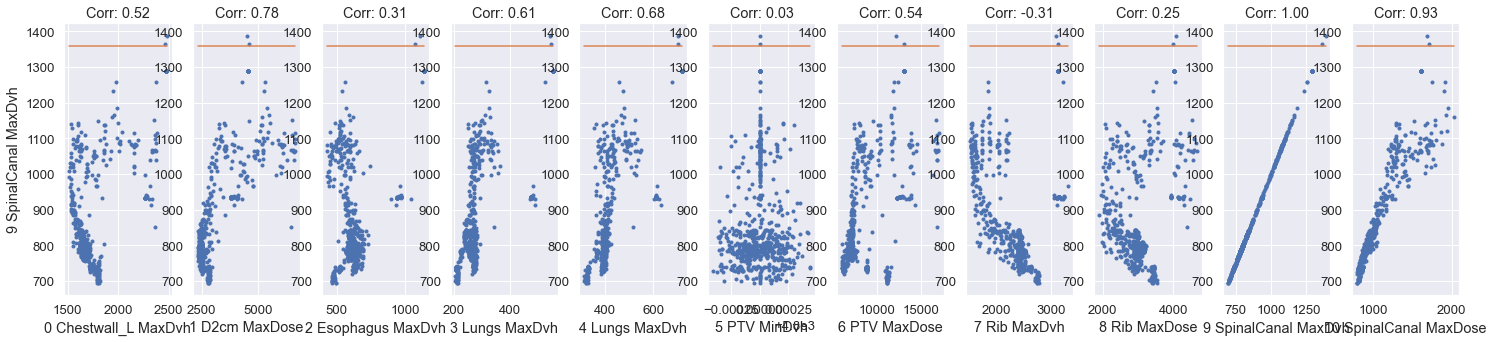

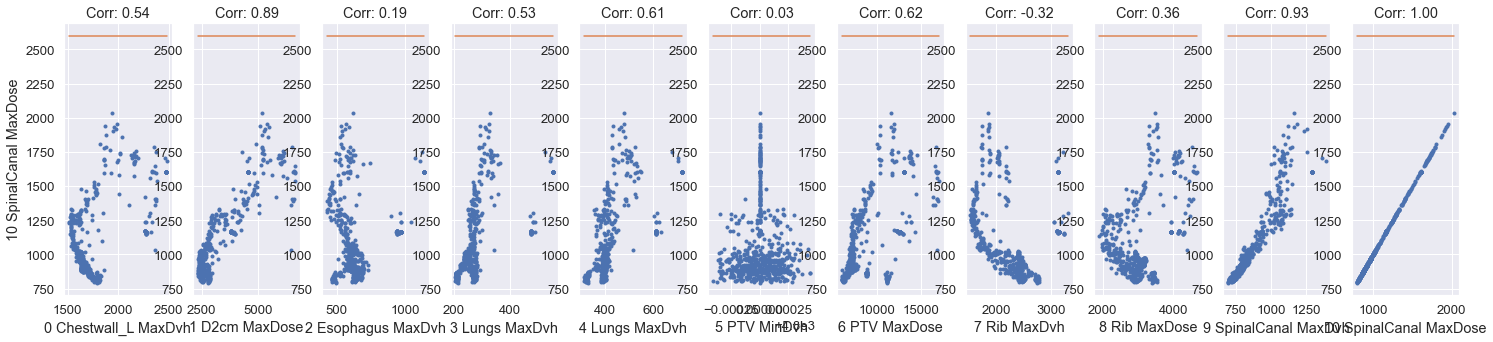

In [441]:
analyze.scatterplot(result.goal_df, goal_dict) # maybe plot vertical line for x-axis goal level?

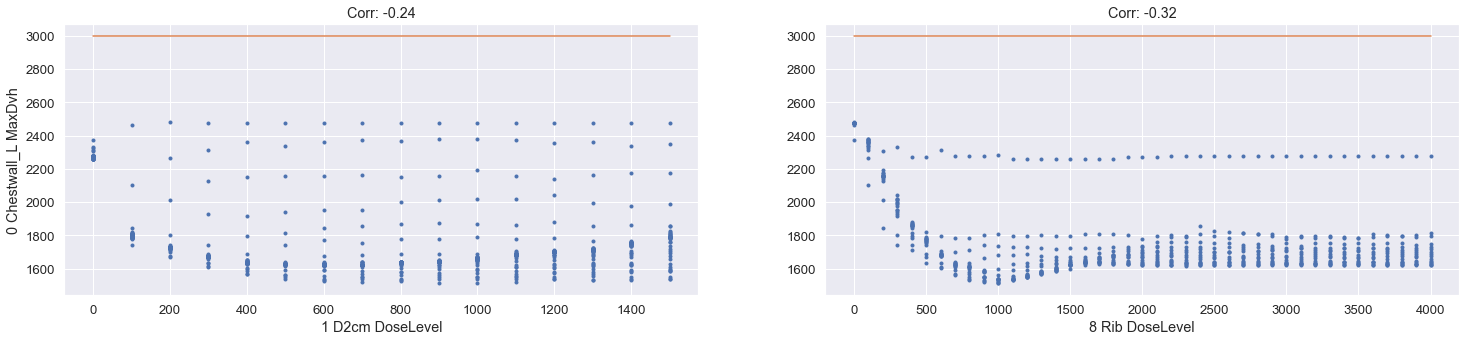

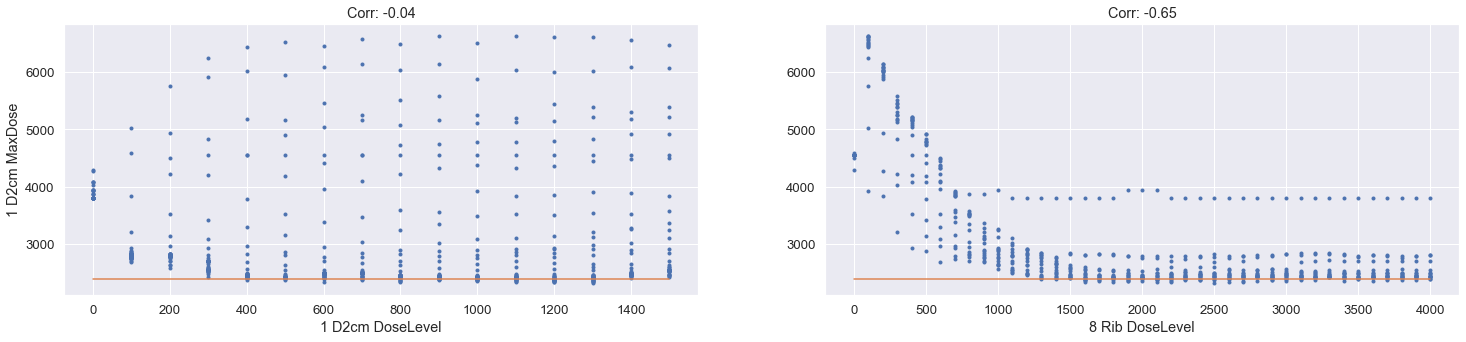

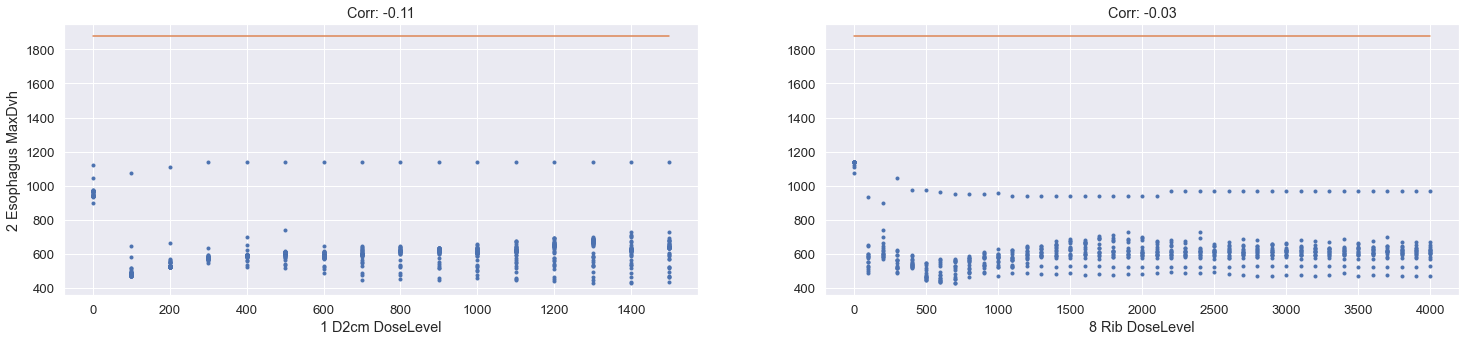

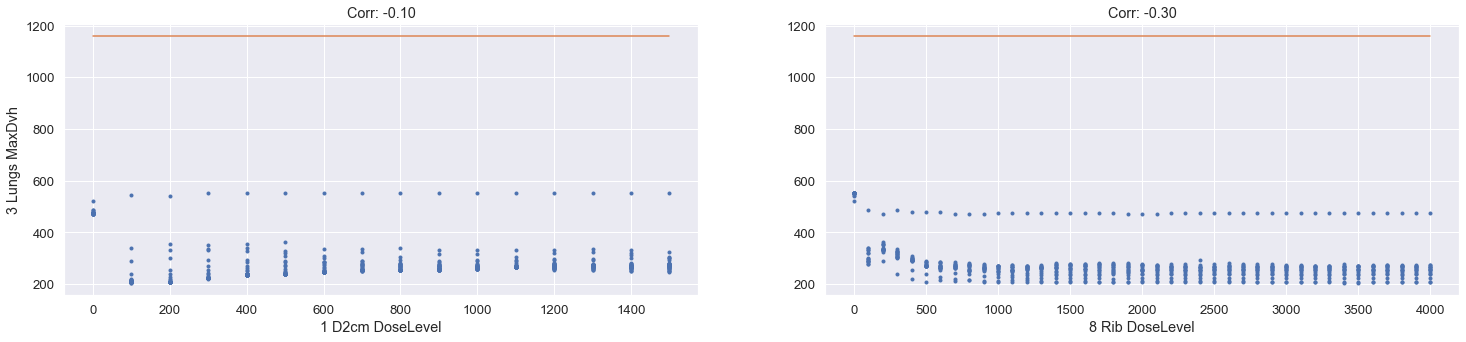

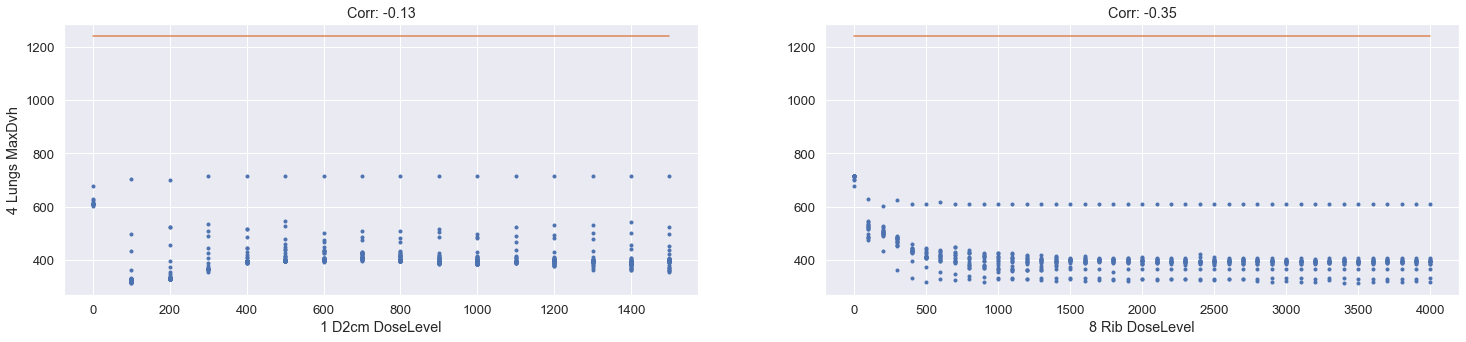

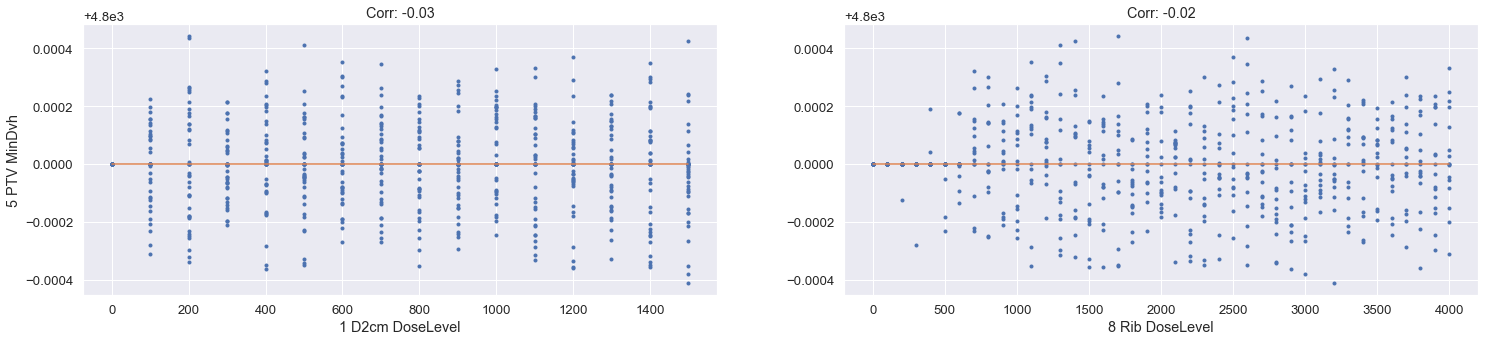

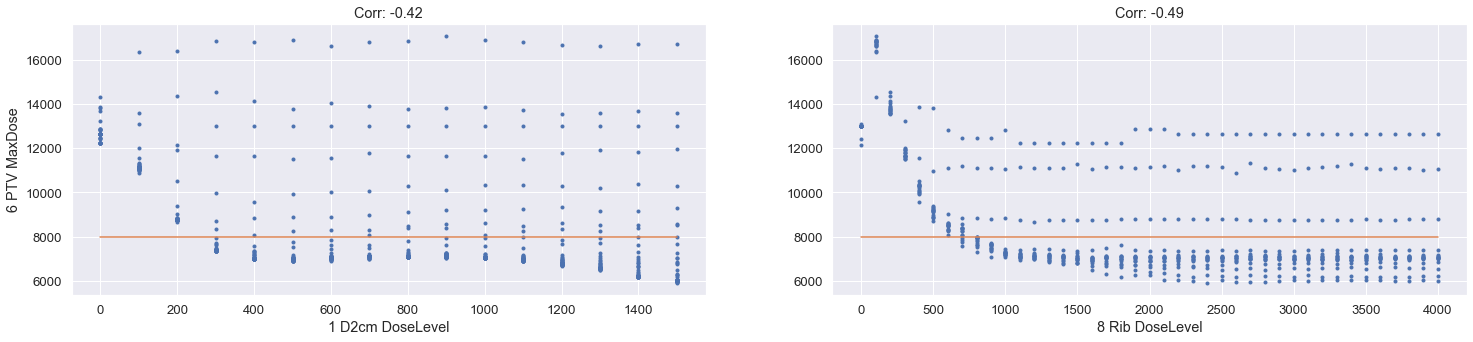

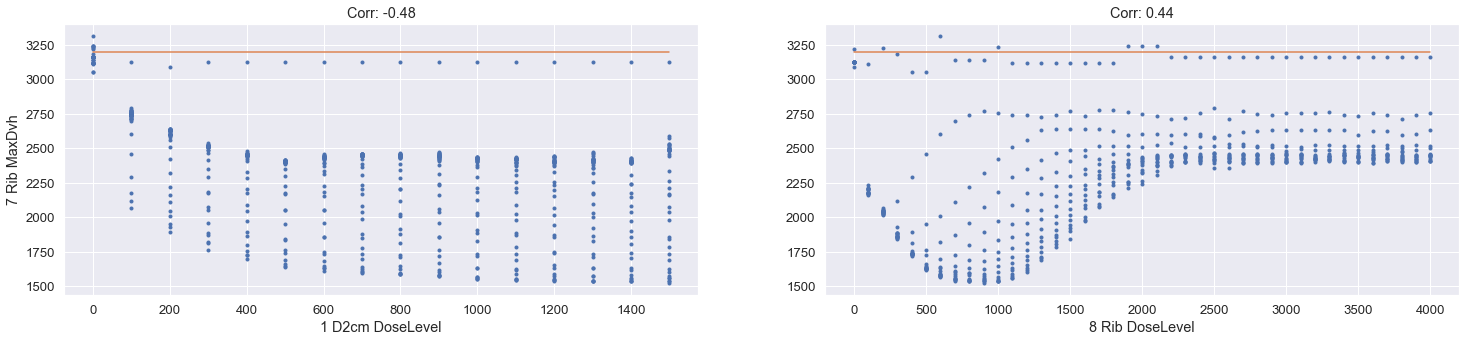

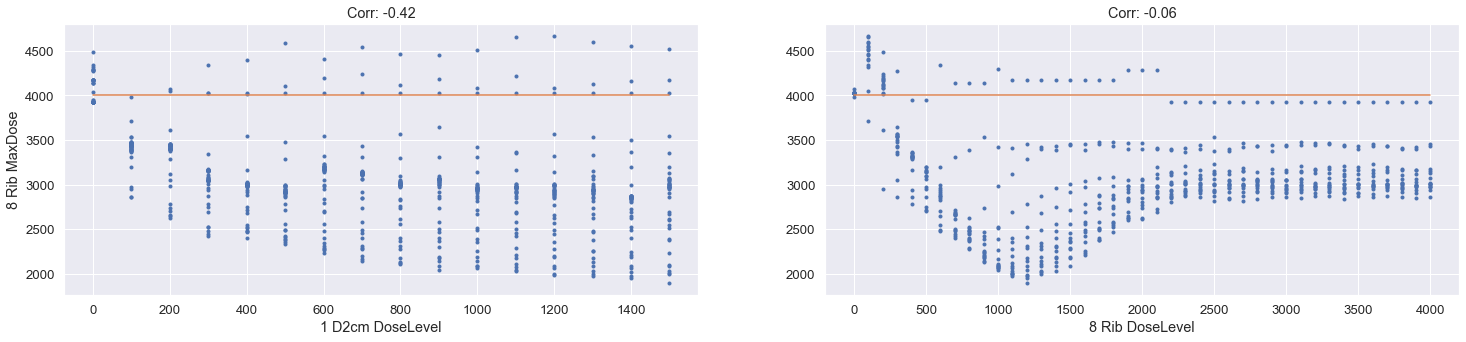

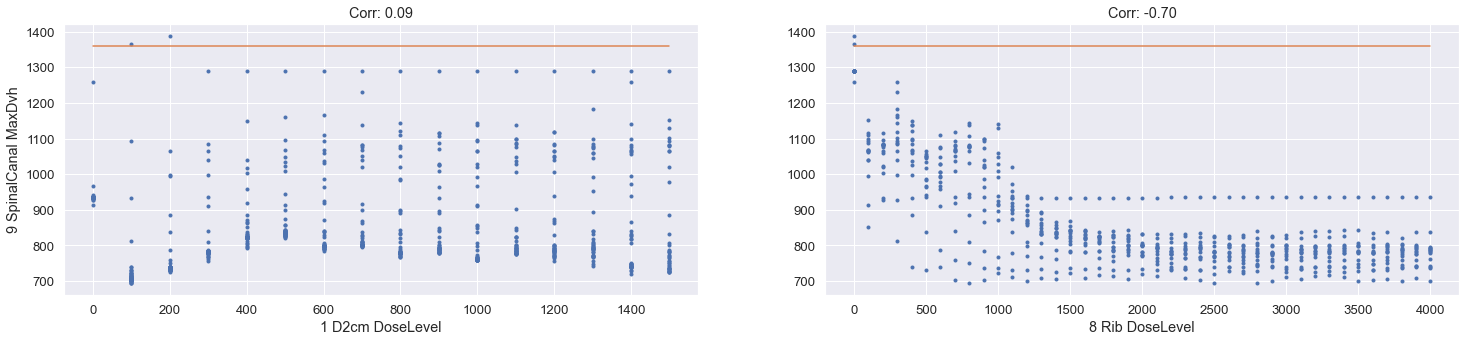

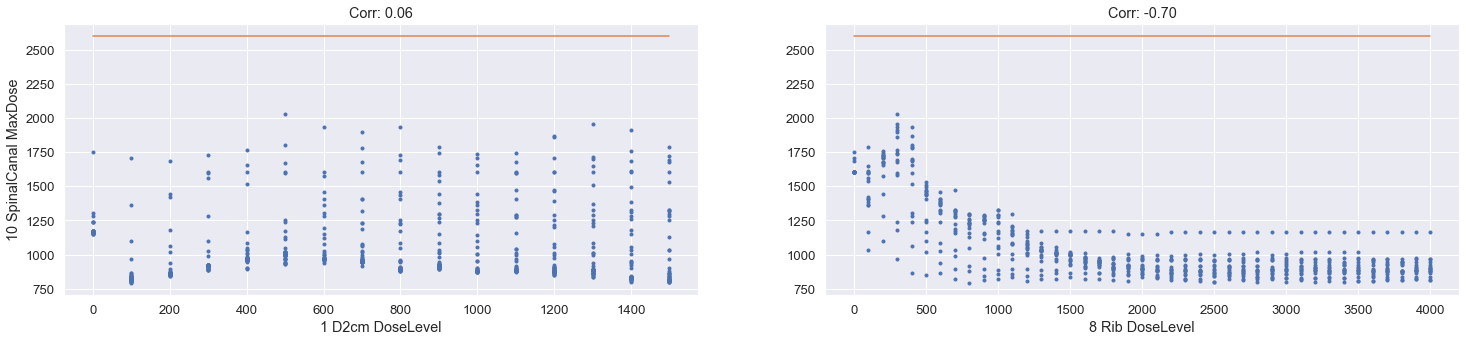

In [442]:
analyze.scatterplot(result.goal_df, goal_dict, result.func_df, x_iters)

In [ ]:
# Might be nice to color the points based on parameter or flag values!